In [1]:
import os  
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
import matplotlib.image as mimage  
import cv2 as cv  
import random 
from PIL import Image
 
import warnings 
warnings.filterwarnings("ignore")

refer - https://www.kaggle.com/code/adinishad/driver-drowsiness-using-keras/notebook 
for testing - https://data-flair.training/blogs/python-project-driver-drowsiness-detection-system/

In [2]:
%pwd

'd:\\Final _proj\\Driver Drawsines\\research'

In [3]:
os.chdir("..")

In [4]:
# dataset classes 
path = "dataset_new/train/" 
op_classes = os.listdir(path) 
print(f"there are {len(op_classes)} which are {op_classes}")

there are 4 which are ['Closed', 'no_yawn', 'Open', 'yawn']


In [5]:
## see how many images of each class 
for cla in os.listdir(path): 
    img_inside_class = os.listdir(path+cla) 
    print(f"class {cla} ===> {len(img_inside_class)} images")

class Closed ===> 617 images
class no_yawn ===> 616 images
class Open ===> 617 images
class yawn ===> 617 images


- by looking at images count there are balanced dataset 

In [6]:
import random 
random.randint(1,616)

440

In [7]:
num = random.randint(1,616)
num

177

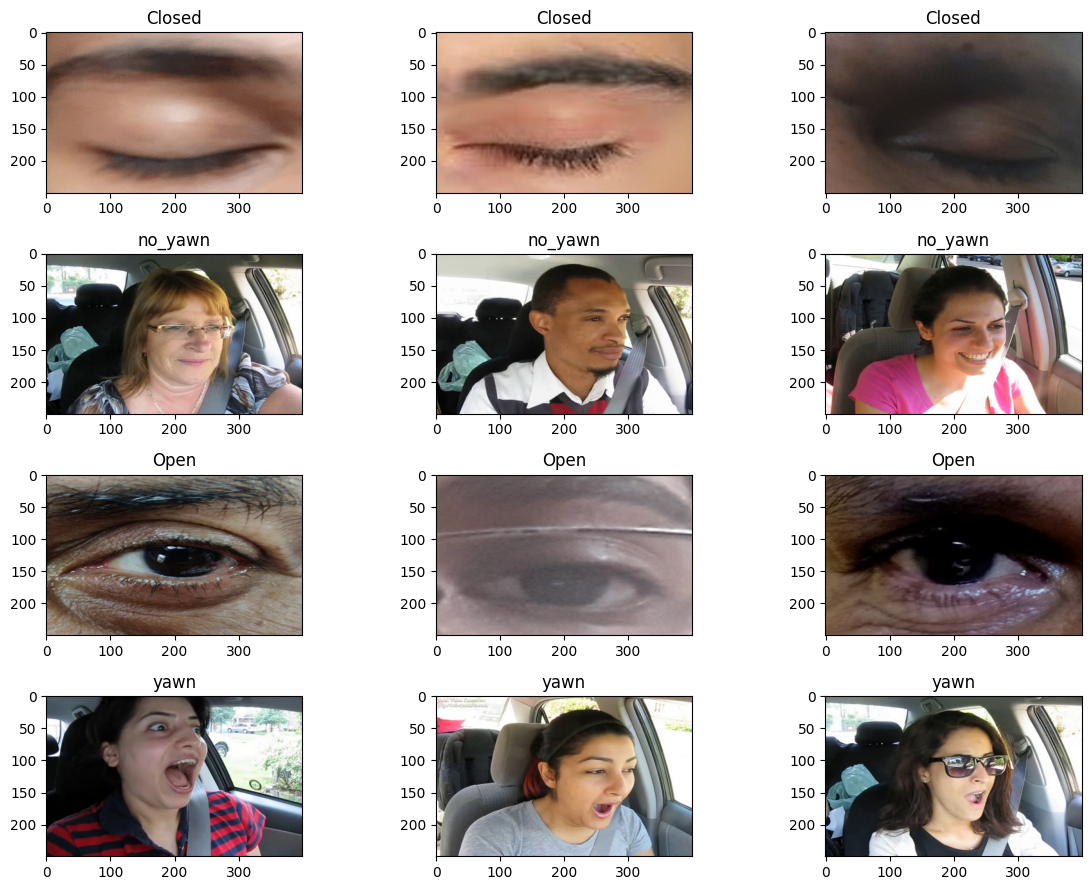

In [8]:
## plotting sample images  of each class 
plt.figure(figsize=(12, 9)) 
counter = 1  

for cla in os.listdir(path):     
    img_inside_class = os.listdir(path + cla)     
    for _ in range(3):  
        img = img_inside_class[random.randint(1, len(img_inside_class) - 1)]    
        plt.subplot(4, 3, counter) 
        im =Image.open(path + cla + "/" + img)  
        im = im.resize((400,250)) 
        plt.title(cla)  
        plt.imshow(im)  
        counter += 1
plt.tight_layout()
plt.show()


In [9]:
def face_for_yawn(direc="dataset_new/train", face_cas_path="C:/Users/rohit/Downloads/haarcascade_frontalface_default.xml"):
    yaw_no = [] 
    IMG_SIZE = 145  
    categories = ['no_yawn','yawn'] 
    for category in categories:
        path_link = os.path.join(direc, category)
        class_num1 = categories.index(category) 
        print(class_num1)  
        for image in os.listdir(path_link):
            image_array = cv.imread(os.path.join(path_link, image), cv.IMREAD_COLOR)
            face_cascade = cv.CascadeClassifier(face_cas_path) 
            faces = face_cascade.detectMultiScale(image_array, 1.3, 5)
            for (x, y, w, h) in faces:
                img = cv.rectangle(image_array, (x, y), (x+w, y+h), (0, 255, 0), 2)
                roi_color = img[y:y+h, x:x+w]
                resized_array = cv.resize(roi_color, (IMG_SIZE, IMG_SIZE))
                yaw_no.append([resized_array, class_num1])
    return yaw_no
yawn_no_yawn = face_for_yawn()

0
1


In [11]:
def get_data(dir_path="dataset_new/train", face_cas="C:/Users/rohit/Downloads/haarcascade_frontalface_default.xml", eye_cas="C:/Users/rohit/Downloads/haarcascade_eye.xml"):
    labels = ['Closed', 'Open']
    IMG_SIZE = 145
    data = []
    for label in labels:
        path = os.path.join(dir_path, label)
        class_num = labels.index(label)
        class_num +=2
        print(class_num)
        for img in os.listdir(path):
            try:
                img_array = cv.imread(os.path.join(path, img), cv.IMREAD_COLOR)
                resized_array = cv.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([resized_array, class_num])
            except Exception as e:        
                print(e)
    return data

In [12]:
data_train = get_data()

2
3


In [13]:
labels = []  
features = []
for feature , label in yawn_no_yawn: 
    labels.append(label) 
    features.append(feature) 
for feature , label in data_train: 
    labels.append(label) 
    features.append(feature)

In [14]:
len(labels),len(features),len(yawn_no_yawn)

(1644, 1644, 410)

- reshaping the Array

In [15]:
X = np.array(features)
X = X.reshape(-1, 145, 145, 3)

In [16]:
y = labels

In [17]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


- LabelBinarizer

In [18]:
from sklearn.preprocessing import LabelBinarizer
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)


In [19]:
# converting to labels 
y =np.array(y) 

In [20]:
y

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]])

##### Train-test-split

In [21]:
from sklearn.model_selection import train_test_split
seed = 42
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)

In [22]:
len(X_test)

494

## CNN Architecture

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf 
import numpy as np 

In [24]:
print("tensorflow version :" , tf.__version__)

tensorflow version : 2.18.0


In [25]:
import keras
keras.__version__

'3.6.0'

### Data Augmentation

In [26]:
train_gen = ImageDataGenerator(rescale=1/255 ,zoom_range=0.2 , rotation_range=30 ,  horizontal_flip=True)  
test_gen  = ImageDataGenerator(rescale=1/255) 

train_generator = train_gen.flow(np.array(X_train), y_train , shuffle=False) 
test_generator  = test_gen.flow(np.array(X_test) , y_test , shuffle= False) 

In [27]:
train_generator

In [28]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu", input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 143, 143, 256)  │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 71, 71, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 69, 69, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 34, 34, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       100,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 495,140 (1.89 MB)

 Trainable params: 495,140 (1.89 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
history = model.fit(train_generator, epochs=50, validation_data=test_generator, shuffle=True, validation_steps=len(test_generator))

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 109s 3s/step - accuracy: 0.3928 - loss: 1.3362 - val_accuracy: 0.5628 - val_loss: 1.1807
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 92s 3s/step - accuracy: 0.6472 - loss: 0.8691
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 104s 3s/step - accuracy: 0.7960 - loss: 0.4600 - val_accuracy: 0.8623 - val_loss: 0.3445
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.8539 - loss: 0.3614
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 97s 3s/step - accuracy: 0.8480 - loss: 0.3645 - val_accuracy: 0.8765 - val_loss: 0.3182
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 91s 3s/step - accuracy: 0.8467 - loss: 0.3416
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 98s 3s/step - accuracy: 0.8739 - loss: 0.2903 - val_accuracy: 0.9049 - val_loss: 0.1998
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.8902 - loss: 0.2674
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 97s 3s/step - accuracy: 0.8949 - loss: 0.2888 - val_accuracy: 0.8947 - val_loss: 0.2252
Epoch 10/50
36/36 ━━━━━━━━━━━━━━

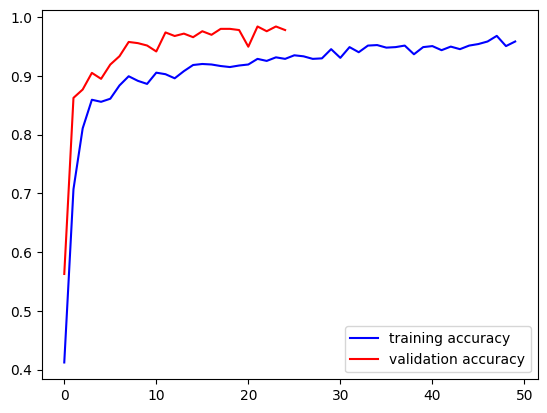

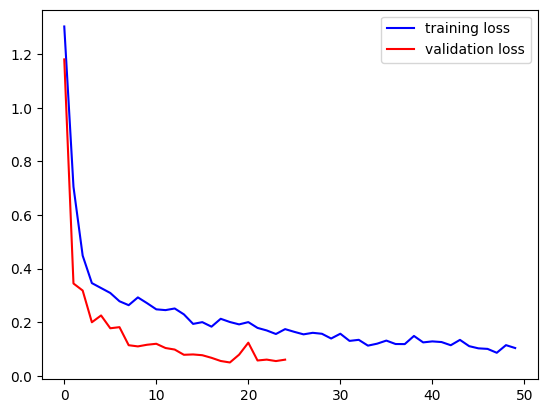

In [50]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))
val_epochs = range(len(val_accuracy))  # Create epochs for validation

plt.plot(epochs, accuracy, "b", label="training accuracy")
plt.plot(val_epochs, val_accuracy, "r", label="validation accuracy")  # Plot shorter val_accuracy
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="training loss")
plt.plot(val_epochs, val_loss, "r", label="validation loss")  # Plot shorter val_loss
plt.legend()
plt.show()


In [41]:
model.save("drowiness_new6.h5") 

In [ ]:
prediction = model.predict(X_test)  


16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 510ms/step


[[0.0, 0.0, 1.0, 0.0],
 [0.0, 0.0, 0.0, 1.0],
 [0.0, 0.0, 0.0, 1.0],
 [0.0, 0.0, 1.0, 0.0],
 [0.0, 0.0, 1.0, 0.0],
 [0.0, 0.0, 0.0, 1.0],
 [0.0, 0.0, 1.0, 0.0],
 [0.0, 0.0, 1.0, 0.0],
 [0.0, 0.0, 0.0, 1.0],
 [0.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 1.0, 0.0],
 [0.0, 0.0, 0.0, 1.0],
 [0.0, 0.0, 0.0, 1.0],
 [0.0, 0.0, 0.0, 1.0],
 [0.0, 0.0, 1.0, 0.0],
 [0.0, 0.0, 1.0, 0.0],
 [0.0, 0.0, 1.0, 0.0],
 [0.0, 0.0, 1.0, 0.0],
 [0.0, 0.0, 0.0, 1.0],
 [0.0, 0.0, 1.0, 0.0],
 [0.0, 0.0, 0.0, 1.0],
 [0.0, 0.0, 0.0, 1.0],
 [0.0, 0.0, 0.0, 1.0],
 [0.0, 0.0, 1.0, 0.0],
 [0.0, 0.0, 0.0, 1.0],
 [0.0, 0.0, 0.0, 1.0],
 [0.0, 0.0, 1.0, 0.0],
 [0.0, 0.0, 1.0, 0.0],
 [0.0, 0.0, 0.0, 1.0],
 [1.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 1.0],
 [1.0, 3.176266888393897e-11, 0.0, 0.0],
 [0.0, 0.0, 1.0, 0.0],
 [0.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 1.0, 0.0],
 [0.0, 0.0, 0.0, 1.0],
 [0.0, 0.0, 0.0, 1.0],
 [0.0, 1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 1.0],
 [1.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 1.0, 0.0],
 [0.0, 0.0, 1.0,

In [55]:
labels = np.argmax(prediction, axis=1)
print(labels)

[2 3 3 2 2 3 2 2 3 1 2 3 3 3 2 2 2 2 3 2 3 3 3 2 3 3 2 2 3 0 3 0 2 1 2 3 3
 1 0 3 0 2 2 0 1 3 2 2 0 1 1 3 2 3 3 2 0 2 0 2 3 0 2 0 1 0 3 0 2 3 3 3 2 2
 1 2 2 2 0 2 0 2 2 3 1 3 3 2 3 0 3 3 2 1 0 0 2 3 3 3 3 2 2 3 3 3 2 2 2 3 1
 2 1 2 3 3 3 3 3 3 2 1 0 3 2 2 2 3 3 1 3 2 2 2 0 2 2 2 3 3 3 0 0 2 2 2 3 3
 1 3 0 0 2 1 0 1 3 3 0 3 0 2 3 3 3 0 3 2 3 3 0 2 3 0 1 2 2 2 3 3 2 3 3 2 2
 3 0 3 2 2 2 3 3 3 2 3 3 1 0 3 3 2 2 1 3 3 2 3 2 2 3 1 3 3 2 1 2 3 0 3 3 3
 0 2 2 2 2 3 1 2 3 3 1 3 0 1 2 3 1 2 2 3 0 3 2 3 1 0 1 3 2 2 1 0 2 2 0 0 2
 2 1 2 2 2 1 2 3 3 3 2 2 3 3 0 2 0 0 1 3 0 2 0 3 2 2 2 0 3 2 2 0 3 2 2 2 2
 3 2 2 3 2 2 2 2 1 3 2 3 3 2 1 1 2 3 2 0 2 2 0 3 3 3 3 3 1 0 1 0 0 2 3 3 3
 2 1 2 3 3 1 2 1 3 3 3 2 3 3 3 3 3 2 2 2 3 2 2 3 2 2 1 3 3 2 2 3 3 1 3 3 2
 3 1 2 3 3 2 3 3 1 3 3 2 0 3 2 2 2 3 1 2 1 3 3 3 2 2 1 2 3 2 3 2 2 0 2 3 0
 2 3 3 0 3 2 3 3 1 0 3 2 3 2 3 3 3 1 2 3 2 2 3 3 3 2 2 3 3 3 2 2 3 2 3 3 2
 2 2 3 1 0 2 1 3 2 2 2 3 2 3 3 3 0 3 3 1 2 0 2 3 1 0 3 3 3 3 2 2 2 1 0 3 3
 2 0 2 1 2 3 0 2 3 1 3 2 

In [3]:
from tensorflow.keras.models import load_model 
model1 = load_model("drowiness_new6.h5")
prediction = model1.predict(X_test)  
labels = np.argmax(prediction, axis=1)
print(labels)

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'drowiness_new6.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [43]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]

In [53]:
from sklearn.metrics import accuracy_score , classification_report
accu = accuracy_score( tf.argmax(prediction , axis=1) , np.argmax(y_test , axis=1)) 
print(f"Accuracy Score : {np.round(accu , 2)}%") 
print() 
print("--"*30)
classification_repo = classification_report(tf.argmax(prediction , axis=1) , tf.argmax(y_test , axis=1)) 
print(f"classification report \n{classification_repo}") 
print("--"*30)

Accuracy Score : 0.95%

------------------------------------------------------------
classification report 
              precision    recall  f1-score   support

           0       0.98      0.77      0.86        64
           1       0.78      0.98      0.87        55
           2       0.98      0.98      0.98       181
           3       0.98      0.98      0.98       194

    accuracy                           0.95       494
   macro avg       0.93      0.93      0.92       494
weighted avg       0.96      0.95      0.95       494

------------------------------------------------------------


## Prediction 

array([[0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       ...,
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

In [57]:
classes = ['no_yawn','yawn' ,'Closed', 'Open']  
IMG_SIZE = 145 

def prepare(filepath, face_cas="C:/Users/rohit/Downloads/haarcascade_frontalface_default.xml"):
    img_array = cv.imread(filepath, cv.IMREAD_COLOR) 
    plt.imshow(img_array)
    img_array = img_array / 255
    resized_array = cv.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3) 

model = tf.keras.models.load_model("drowiness_new6.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


0

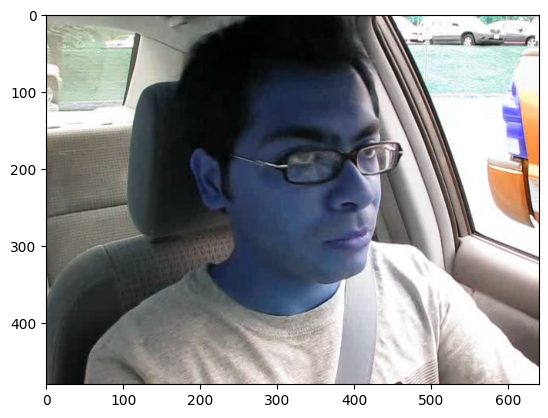

In [129]:
prediction = model.predict([prepare("dataset_new/test/no_yawn/646.jpg")]) # 0- no_yawn
np.argmax(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


3

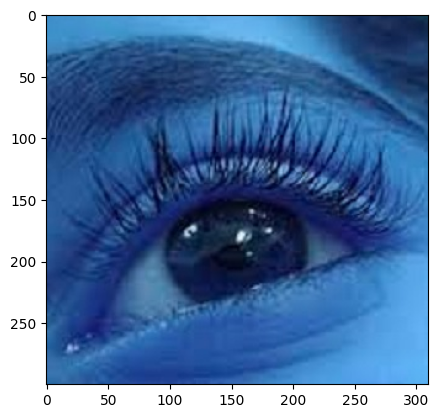

In [92]:
prediction = model.predict([prepare("dataset_new/test/Open/_95.jpg")]) # 3- open
np.argmax(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


2

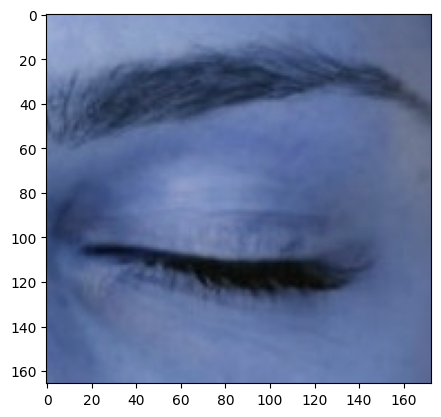

In [ ]:
prediction = model.predict([prepare("dataset_new/test/Closed/_107.jpg")]) # 2- closed
np.argmax(prediction)

In [135]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

classes = ['no_yawn', 'yawn', 'Closed', 'Open']  # Class labels
IMG_SIZE = 145  # Image size for resizing
face_cascade = cv.CascadeClassifier("C:/Users/rohit/Downloads/haarcascade_frontalface_default.xml")

# Prepare the frame for prediction
def prepare_frame(frame):
    faces = face_cascade.detectMultiScale(frame, scaleFactor=1.1, minNeighbors=5)
    for (x, y, w, h) in faces:
        face = frame[y:y+h, x:x+w]  # Crop the detected face
        resized_face = cv.resize(face, (IMG_SIZE, IMG_SIZE))  # Resize to match model input
        resized_face = resized_face / 255.0  # Normalize
        return resized_face.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
    return None


In [147]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

classes = ['no_yawn', 'yawn', 'Closed', 'Open']  # Class labels
IMG_SIZE = 145  # Image size for resizing
face_cascade = cv.CascadeClassifier("C:/Users/rohit/Downloads/haarcascade_frontalface_default.xml")

# Prepare the frame for prediction
def prepare_frame(frame):
    gray_frame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)  # Convert to grayscale for better detection
    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5)
    face_list = []
    coords = []
    for (x, y, w, h) in faces:
        face = frame[y:y+h, x:x+w]  # Crop the detected face
        resized_face = cv.resize(face, (IMG_SIZE, IMG_SIZE))  # Resize to match model input
        resized_face = resized_face / 255.0  # Normalize
        face_list.append(resized_face.reshape(-1, IMG_SIZE, IMG_SIZE, 3))
        coords.append((x, y, w, h))
    return face_list, coords

# Start video capture
cap = cv.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    processed_frames, coords = prepare_frame(frame)
    if processed_frames:
        for i, processed_frame in enumerate(processed_frames):
            prediction = model.predict(processed_frame)
            predicted_class = np.argmax(prediction) 
            class_label = classes[predicted_class]
            x, y, w, h = coords[i]

            # Draw rectangle around the face
            cv.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
            
            # Display predicted label on frame
            cv.putText(frame, f'{class_label}', (x, y-10), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Smoothen video quality by applying a Gaussian blur
    frame = cv.GaussianBlur(frame, (5, 5), 0)

    cv.imshow('Real-time Emotion Detection', frame)

    # Press 'q' to quit
    if cv.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [4]:
%pwd

'd:\\Final _proj\\Driver Drawsines\\research'

In [ ]:
# Now we selecting only those face which have maximum rectangle value
classifier = cv.CascadeClassifier("C:/Users/rohit/Downloads/haarcascade_frontalface_default.xml")

cam = cv.VideoCapture(0)

while True:
    
    _ , img = cam.read()
    img = cv.flip(img , 1)
    
    faces = classifier.detectMultiScale(img ,1.5 , 5) 
    
    for f in faces:                                  # goging through each face
        if f[-1] == max(faces[ :, -1]):             # finding the face with maximum area
            break
    if len(faces)>=1:
        x = f[0] 
        y = f[1]
        w = f[2]
        h = f[3]

        cv.rectangle(img , (x,y) ,(x+w, y+h) , (0,180,0),3)
        face = img[y:y+h,x : x+w ]
        
        face = cv.resize(face , (250 ,250))

    cv.imshow('Frame' , img)
    cv.imshow('face' , face)
    
    if cv.waitKey(1) == 13 :
        cam.release()
        cv.destroyAllWindows()
        break